<h3 style="background-color:yellow;"> Task:-1 Read the faithful.csv file and store it in a variable named geyser. Display the first 5 rows of the dataframe geyser.</h3>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
geyser = pd.read_csv("faithful.csv")
geyser.head() #head() returns first 5 rows

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


<h3 style="background-color:yellow;">Task-:2 Make a scatter plot of the data that is in original units. It is conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. Also, the plot must display appropriate x-label, y-label, and title.</h3>

In [3]:
x = geyser.iloc[:,0].values # Eruptions Duration (x-axis)
y = geyser.iloc[:,1].values # Waiting Time (y-axis)

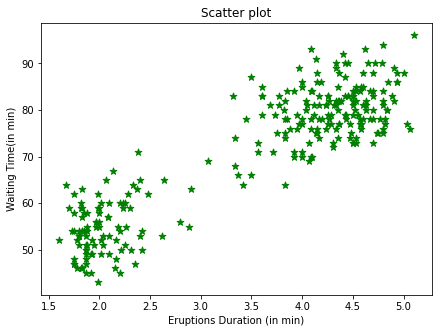

In [4]:
plt.figure(figsize=(7,5))
plt.scatter(x, y,s=50,marker ='*', color = "green")
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("Waiting Time(in min)")
plt.title('Scatter plot')
plt.show()

<h3 style="background-color:yellow;">Task-3: Compute the mean and standard deviation of the eruption durations and store it in variables named duration_mean and duration_std, respectively. Similarly, compute the mean and standard deviation of the waiting times and store it in variables named wait_mean and wait_std, respectively. Print duration_mean, duration_std, wait_mean, and wait_std to the output.</h3>

In [5]:
geyser.describe()

,duration,wait
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


In [6]:
duration_mean = x.mean()

In [7]:
duration_std = x.std()

In [8]:
wait_mean = y.mean()

In [9]:
wait_std = y.std()

In [10]:
duration_mean

3.4877830882352936

In [11]:
duration_std

1.139271210225768

In [12]:
wait_mean

70.8970588235294

In [13]:
wait_std

13.569960017586371

<h3 style="background-color:yellow;"> Task-4: Compute the eruption duration in standard units and append it as a new column named duration (standard units) to the dataframe geyser. Also, compute the waiting times in standard units and append it as a new column named wait (standard units) to the dataframe geyser. After appending the 2 new columns successfully, print the first 5 rows of the dataframe geyser to the output.</h3>

In [14]:
geyser.head()

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0


In [15]:
geyser['duration (standard units)'] = (geyser['duration'] - duration_mean)/duration_std

In [16]:
geyser['wait (standard units)'] = (geyser['wait'] - wait_mean)/wait_std

In [17]:
geyser.head()

,duration,wait,duration (standard units),wait (standard units)
0,3.600,79.0,0.098499,0.597123
1,1.800,54.0,-1.481459,-1.245181
2,3.333,74.0,-0.135861,0.228663
3,2.283,62.0,-1.057503,-0.655644
4,4.533,85.0,0.917443,1.039277


<h3 style="background-color:yellow;"> Task-5: Make a scatter plot of the data that is in standard units. It is conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis. Also, the plot must display appropriate x-label, y-label, and title. </h3>

In [18]:
x_standard = geyser['duration (standard units)']
y_standard = geyser['wait (standard units)']

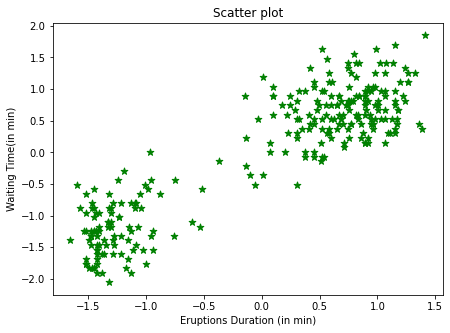

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(x_standard, y_standard,s=50,marker ='*', color = "green")
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("Waiting Time(in min)")
plt.title('Scatter plot')
plt.show()

<h3 style="background-color:yellow;">
Task-6: Compute the correlation coefficient based on the eruption durations and the waiting times that are in standard units and store it in a variable named r. Print r to the output. </h3>

In [20]:
r = np.corrcoef(x_standard, y_standard)

In [21]:
r

array([[1.        , 0.90081117],
       [0.90081117, 1.        ]])

In [22]:
 r[0, 1] # correlation coefficient between x and y

0.9008111683218125

<h3 style="background-color:yellow;">Task-7: Recall that the correlation is the slope of the regression line when the data are put in standard units. In this task, repeat task-5 but the plot must also display the regression line which can be computed as:

waiting time (standard units)=𝑟×eruption duration (standard units).

For the regression line, just take two eruption duration values -2 and 2 and predict the waiting times for each of those two values based on the above equation. In other words, use the two (x,y) points (i.e., (-2, -2r) and (2, 2r)) to plot the regression line. </h3>

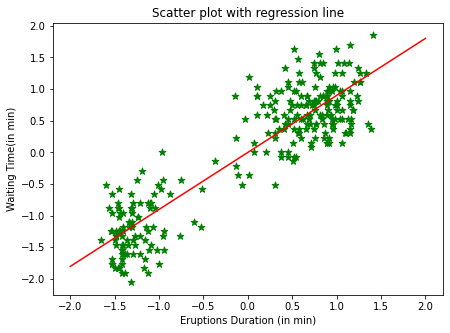

In [23]:
point1 = [-2,-2* r[0, 1]]
point2 = [2,2* r[0, 1]]
x_val = [point1[0],point2[0]]
y_val = [point1[1],point2[1]]
plt.figure(figsize=(7,5))
plt.scatter(x_standard, y_standard,s=50,marker ='*', color = "green")
plt.plot(x_val,y_val,color='r')
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("Waiting Time(in min)")
plt.title('Scatter plot with regression line')
plt.show()

<h3 style="background-color:yellow;">Task-8: Compute the slope and the intercept of the regression line in original units and store them in variables named slope_originalunits and intercept_originalunits, respectively. Print slope_originalunits and intercept_originalunits to the output.</h3>

In [24]:
x = x.reshape(-1, 1)

In [25]:
model = LinearRegression()

In [26]:
model.fit(x,y) # here x and y is in original units

LinearRegression()

In [27]:
intercept_originalunits = model.intercept_
print(intercept_originalunits)

33.474397022753365


In [28]:
slope_originalunits = model.coef_
print(slope_originalunits)

[10.7296414]


<h3 style="background-color:yellow;">Task-9: Write a function named predict_waiting_time that will take duration time as the argument. The function that you write must return the prediction of the waiting time based on the slope, the intercept, and the duration time values. After writing the function, call the function twice and pass the duration times 1 minute and 6 minutes, respectively. Store the returned prediction of the waiting times for duration times of 1 minute and 6 minutes in variables named predicted_wait_time_for1mins and predicted_wait_time_for6mins, repectively and print them to the output. </h3>

In [29]:
def predict_waiting_time(time):
    return (intercept_originalunits + slope_originalunits*time)[0]

In [30]:
predicted_wait_time_for1mins = predict_waiting_time(1)
predicted_wait_time_for1mins

44.204038417886885

In [31]:
predicted_wait_time_for6mins = predict_waiting_time(6)
predicted_wait_time_for6mins

97.8522453935545

<h3 style="background-color:yellow;">Task-10: Make a scatter plot of the data that is in original units together with the regression line. Also, the plot must display appropriate x-label, y-label, and title.

For the regression line, just take two eruption duration values in minutes that you used in previous task 1 minute and 6 minutes and the predicted waiting times in minutes for each of those two values that you obtained in the previous task. In other words, use the two (x,y) points (i.e., (1, predicted_wait_time_for1mins) and (6, predicted_wait_time_for6mins)) to plot the regression line. </h3>

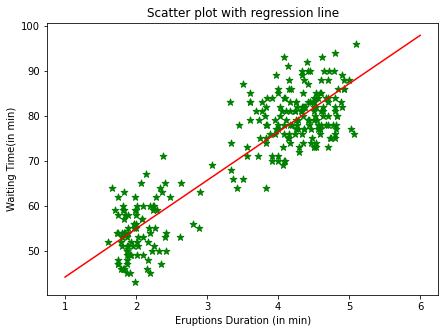

In [32]:
point1 = [1,predicted_wait_time_for1mins]
point2 = [6,predicted_wait_time_for6mins]
x_val = [point1[0],point2[0]]
y_val = [point1[1],point2[1]]
plt.figure(figsize=(7,5))
plt.scatter(x, y,s=50,marker ='*', color = "green")
plt.plot(x_val,y_val,color='r')
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("Waiting Time(in min)")
plt.title('Scatter plot with regression line')
plt.show()

<h3 style="background-color:yellow;">Task-11: Predict the waiting times in minutes for all the eruption duration values in the dataframe geyser. Add the predicted waiting times as a new column named predicted wait to the dataframe geyser. Print the first 5 rows of the dataframe geyser to the output. </h3>

In [33]:
geyser['predicted wait'] = intercept_originalunits + slope_originalunits*geyser['duration']

In [34]:
geyser.head()

,duration,wait,duration (standard units),wait (standard units),predicted wait
0,3.600,79.0,0.098499,0.597123,72.101106
1,1.800,54.0,-1.481459,-1.245181,52.787752
2,3.333,74.0,-0.135861,0.228663,69.236292
3,2.283,62.0,-1.057503,-0.655644,57.970168
4,4.533,85.0,0.917443,1.039277,82.111861


<h3 style="background-color:yellow;"> Task-12: Make a scatter plot of the actual data that is in original units together with the regression line. The regression line can be plotted based on the columns duration and predicted wait. Also, the plot must display appropriate x-label, y-label, and title.

Note: The only difference between task-10 and this task is that in task-10, you would have plotted the regression line based on only 2 eruption duration times and the corresponding predicted waiting times whereas in this task, you will plot the regression line using all of the values of the eruption duration times and the corresponding predicted waiting times.</h3>

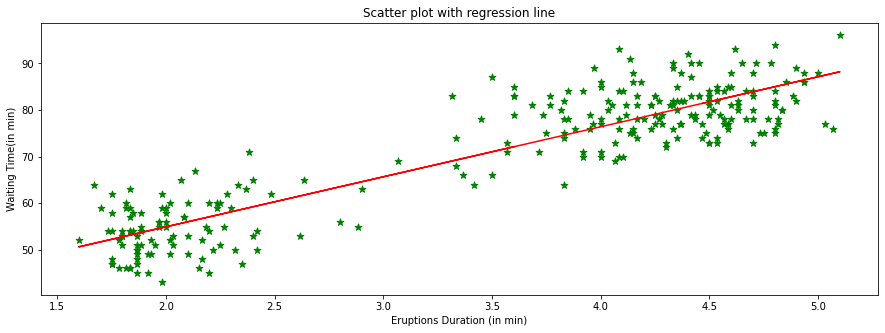

In [35]:
plt.figure(figsize=(15,5))
plt.scatter(x, y,s=50,marker ='*', color = "green")
plt.plot(x,geyser.iloc[:,4].values,color='r')
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("Waiting Time(in min)")
plt.title('Scatter plot with regression line')
plt.show()

<h3 style="background-color:yellow;">Task-13: Calculate the error in the predictions by computing the difference between the predicted waiting times and the actual waiting times. Add the error values as a new column named error to the dataframe geyser. Print the first 5 rows of the dataframe geyser to the output. </h3>

In [36]:
geyser['error'] = geyser['predicted wait'] - geyser['wait']

In [37]:
geyser.head()

,duration,wait,duration (standard units),wait (standard units),predicted wait,error
0,3.600,79.0,0.098499,0.597123,72.101106,-6.898894
1,1.800,54.0,-1.481459,-1.245181,52.787752,-1.212248
2,3.333,74.0,-0.135861,0.228663,69.236292,-4.763708
3,2.283,62.0,-1.057503,-0.655644,57.970168,-4.029832
4,4.533,85.0,0.917443,1.039277,82.111861,-2.888139


<h3 style="background-color:yellow;">Task-14: Make a scatter plot of the error values that you computed in the previous task. The x-axis must be the eruption duration values in minutes and the plot shows how much our prediction over- or under-estimated the waiting times for different erpution duration times. Also, the plot must display appropriate x-label, y-label, and title. </h3>

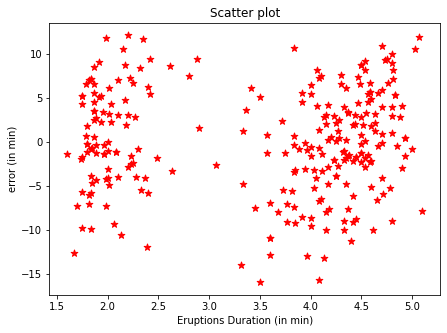

In [38]:
plt.figure(figsize=(7,5))
plt.scatter(x,geyser.iloc[:,5].values ,s=50,marker ='*', color = "red")
plt.xlabel("Eruptions Duration (in min)")
plt.ylabel("error (in min)")
plt.title('Scatter plot')
plt.show()

<h3 style="background-color:yellow;">Task-15: Calculate the mean squared error (MSE) and the root mean squared error (RMSE) in the predicted waiting times, and store them in variables named MSE and RMSE, respectively. Print MSE and RMSE to the output. </h3>

In [39]:
from sklearn.metrics import mean_squared_error
import math

In [40]:
y_pred = geyser.iloc[:,4].values

In [41]:
MSE = mean_squared_error(y, y_pred)
print(MSE)

34.718334728738185


In [42]:
RMSE = math.sqrt(MSE)
print(RMSE)

5.892226635893954
